In [1]:
import numpy as np
import pandas as pd
import geopandas as gpd

import matplotlib as mpl
import matplotlib.font_manager as fm
import matplotlib.pyplot as plt
import seaborn as sns

import datetime

In [2]:
colors = ["#648FFF", "#785EF0", "#DC267F", "#FE6100", "#FFB000", "#000000", "#FFFFFF"]
colors_grad = sns.color_palette('flare_r',  12)
colors_heat1 = sns.color_palette('flare_r', as_cmap=True)
colors_heat2 = sns.diverging_palette(315, 261, s=74, l=50, center='dark', as_cmap=True)

color_bg = "#1B181C"
color_text = "#FFFFFF"

# @title Plot settings
mpl.rcParams['figure.dpi'] = 600
mpl.rcParams["figure.figsize"] = 16,8

# Text
mpl.rcParams['font.family'] = 'Roboto'

# Title
mpl.rcParams['figure.titlesize'] = 32
mpl.rcParams['axes.titlesize'] = 32
mpl.rcParams['axes.titleweight'] = 'bold'

# Labels
mpl.rcParams['axes.labelsize'] = 22
mpl.rcParams['xtick.labelsize'] = 22
mpl.rcParams['ytick.labelsize'] = 22

# Spacing
mpl.rcParams['axes.titlepad'] = 72
mpl.rcParams['axes.labelpad'] = 10
mpl.rcParams['xtick.major.pad'] = 10
mpl.rcParams['ytick.major.pad'] = 10
mpl.rcParams['xtick.major.width'] = 0
mpl.rcParams['xtick.minor.width'] = 0
mpl.rcParams['ytick.major.width'] = 0
mpl.rcParams['ytick.minor.width'] = 0

# Spines and grids
mpl.rcParams['axes.spines.top'] = False
mpl.rcParams['axes.spines.right'] = False
mpl.rcParams['axes.grid'] = False

# Legends
mpl.rcParams['legend.title_fontsize'] = 18
mpl.rcParams['legend.fontsize'] = 18
mpl.rcParams['legend.frameon'] = False

# Bars
plt.rcParams['patch.linewidth'] = 0
plt.rcParams['patch.edgecolor'] = 'none'

# Colors
mpl.rcParams["figure.facecolor"] = color_bg
mpl.rcParams["axes.facecolor"] = color_bg
mpl.rcParams["savefig.facecolor"] = color_bg

# Text colors
mpl.rcParams['text.color'] = color_text
mpl.rcParams['axes.labelcolor'] = color_text
mpl.rcParams['xtick.color'] = color_text
mpl.rcParams['ytick.color'] = color_text

# Line colors
mpl.rcParams['axes.edgecolor'] = color_text

# Load Dataset

In [3]:
poverty_data = pd.read_csv("CS132_DataSheet-graph_data.csv")

# Data Cleaning

In [4]:
poverty_data['Year'] = poverty_data['Year'].ffill() # fill gaps between years

In [5]:
# y = mx + c
x = poverty_data['Year']
y_poor = poverty_data['Poor Respondent Count']
y_not_poor = poverty_data['Not Poor Respondent Count']
y_borderline = poverty_data['Borderline Respondent Count']

findfont: Font family 'Roboto Bold' not found.
findfont: Font family 'Roboto Bold' not found.
findfont: Font family 'Roboto Bold' not found.
findfont: Font family 'Roboto Bold' not found.
findfont: Font family 'Roboto Bold' not found.


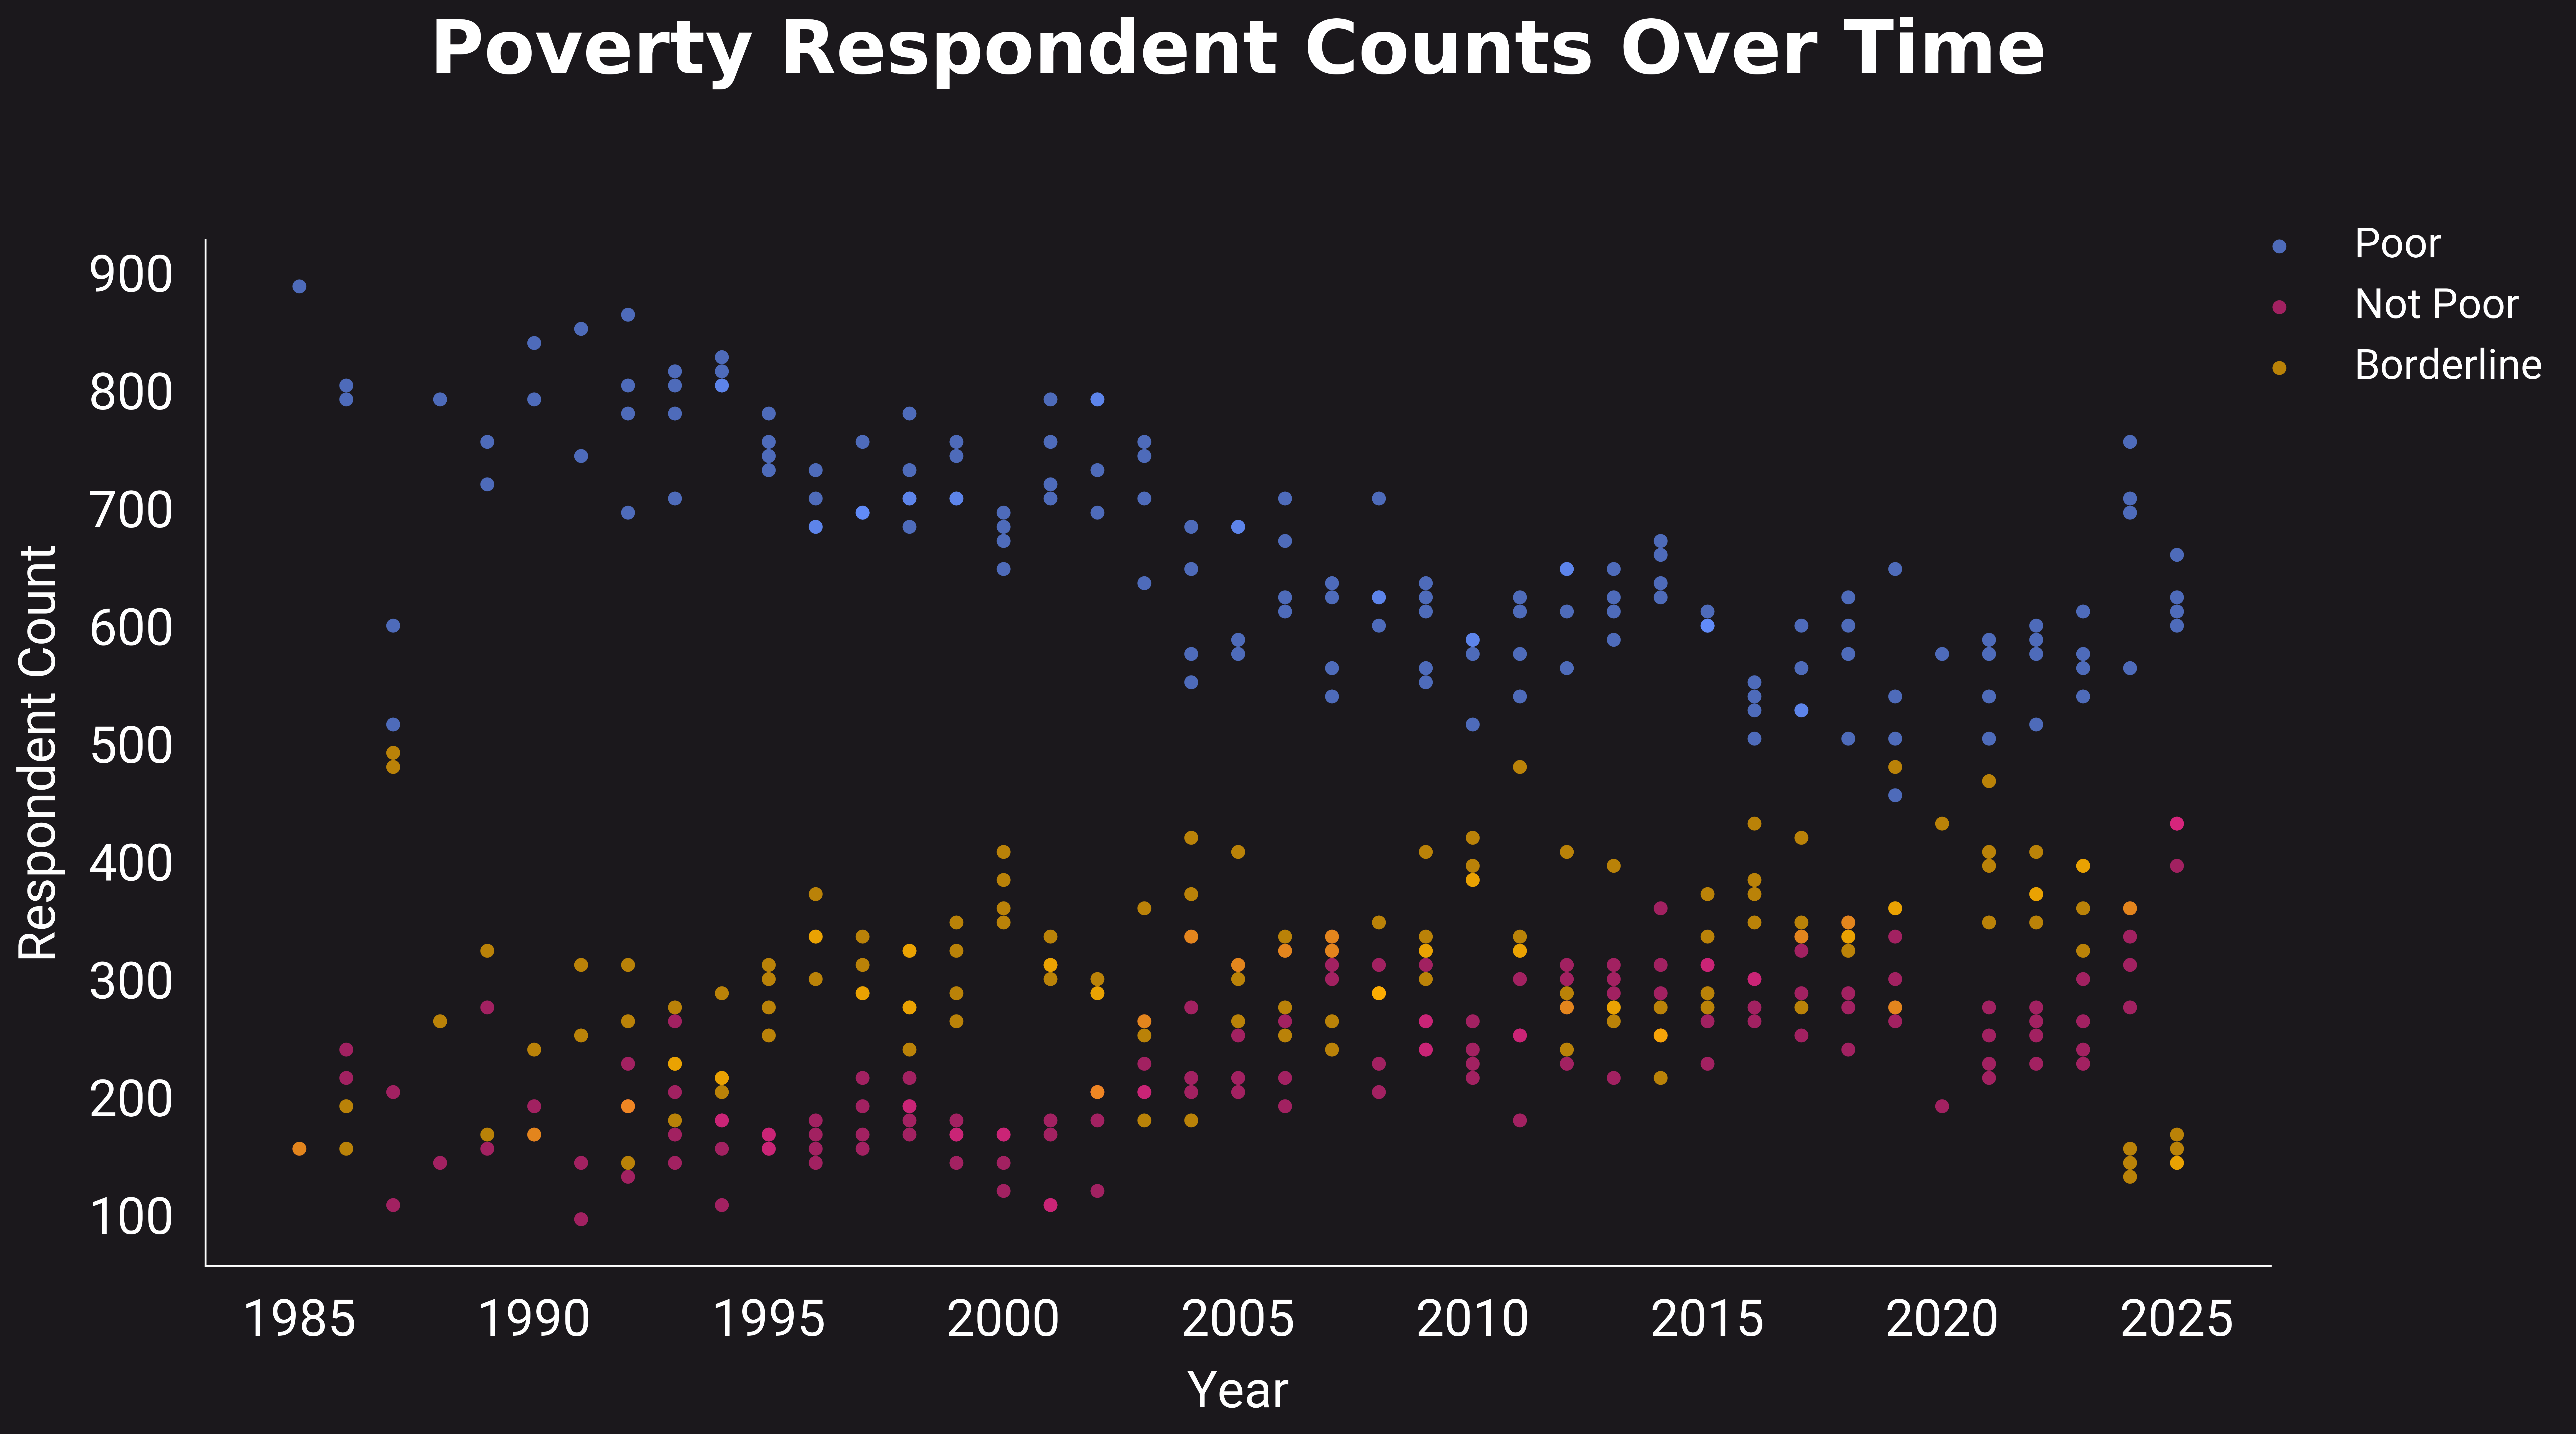

In [6]:
# Create the scatter plot
plt.scatter(x, y_poor, color=colors[0], label='Poor', alpha=0.7)  # Using color #648FFF
plt.scatter(x, y_not_poor, color=colors[2], label='Not Poor', alpha=0.7)  # Using color #785EF0
plt.scatter(x, y_borderline, color=colors[4], label='Borderline', alpha=0.7)  # Using color #DC267F

# Customize the plot
plt.xlabel('Year')
plt.ylabel('Respondent Count')
plt.title('Poverty Respondent Counts Over Time', fontdict={'family' : 'Roboto Bold'})
plt.legend(loc='upper right', bbox_to_anchor=(1.15, 1.05))

# Show the plot
plt.show()

# Data Split

## Import Library

In [7]:
from sklearn.model_selection import train_test_split

## Perform 50/50 Data split

In [8]:
X_train, X_test, Y_train, Y_test = train_test_split(x, y_poor, test_size=0.5)

In [9]:
X_train.shape, X_test.shape, Y_train.shape, Y_test.shape 

((73,), (74,), (73,), (74,))

## Convert X_train and X_test array from 1D to 2D

In [10]:
X_train = np.array(X_train).reshape(-1, 1)
X_test = np.array(X_test).reshape(-1, 1)
Y_test = np.array(Y_test)

# Regression

## Poor

In [11]:
from sklearn import linear_model
from sklearn.metrics import mean_squared_error, r2_score

In [12]:
model = linear_model.LinearRegression()

In [13]:
model.fit(X_train, Y_train)

LinearRegression()

In [14]:
Y_pred = model.predict(X_test)

In [15]:
print(f"Coefficient: {model.coef_}")
print(f"Intercept: {model.intercept_:.2f}")
print(f"Mean Squared Error: {mean_squared_error(Y_test, Y_pred):.2f}")
print(f"R-squared: {r2_score(Y_test, Y_pred):.2f}")

Coefficient: [-7.18907988]
Intercept: 15089.27
Mean Squared Error: 4975.81
R-squared: 0.37


Text(0.5, 1.0, 'Poor Respondent Count Overtime')

findfont: Font family 'Roboto Bold' not found.
findfont: Font family 'Roboto Bold' not found.
findfont: Font family 'Roboto Bold' not found.
findfont: Font family 'Roboto Bold' not found.
findfont: Font family 'Roboto Bold' not found.
findfont: Font family 'Roboto Bold' not found.


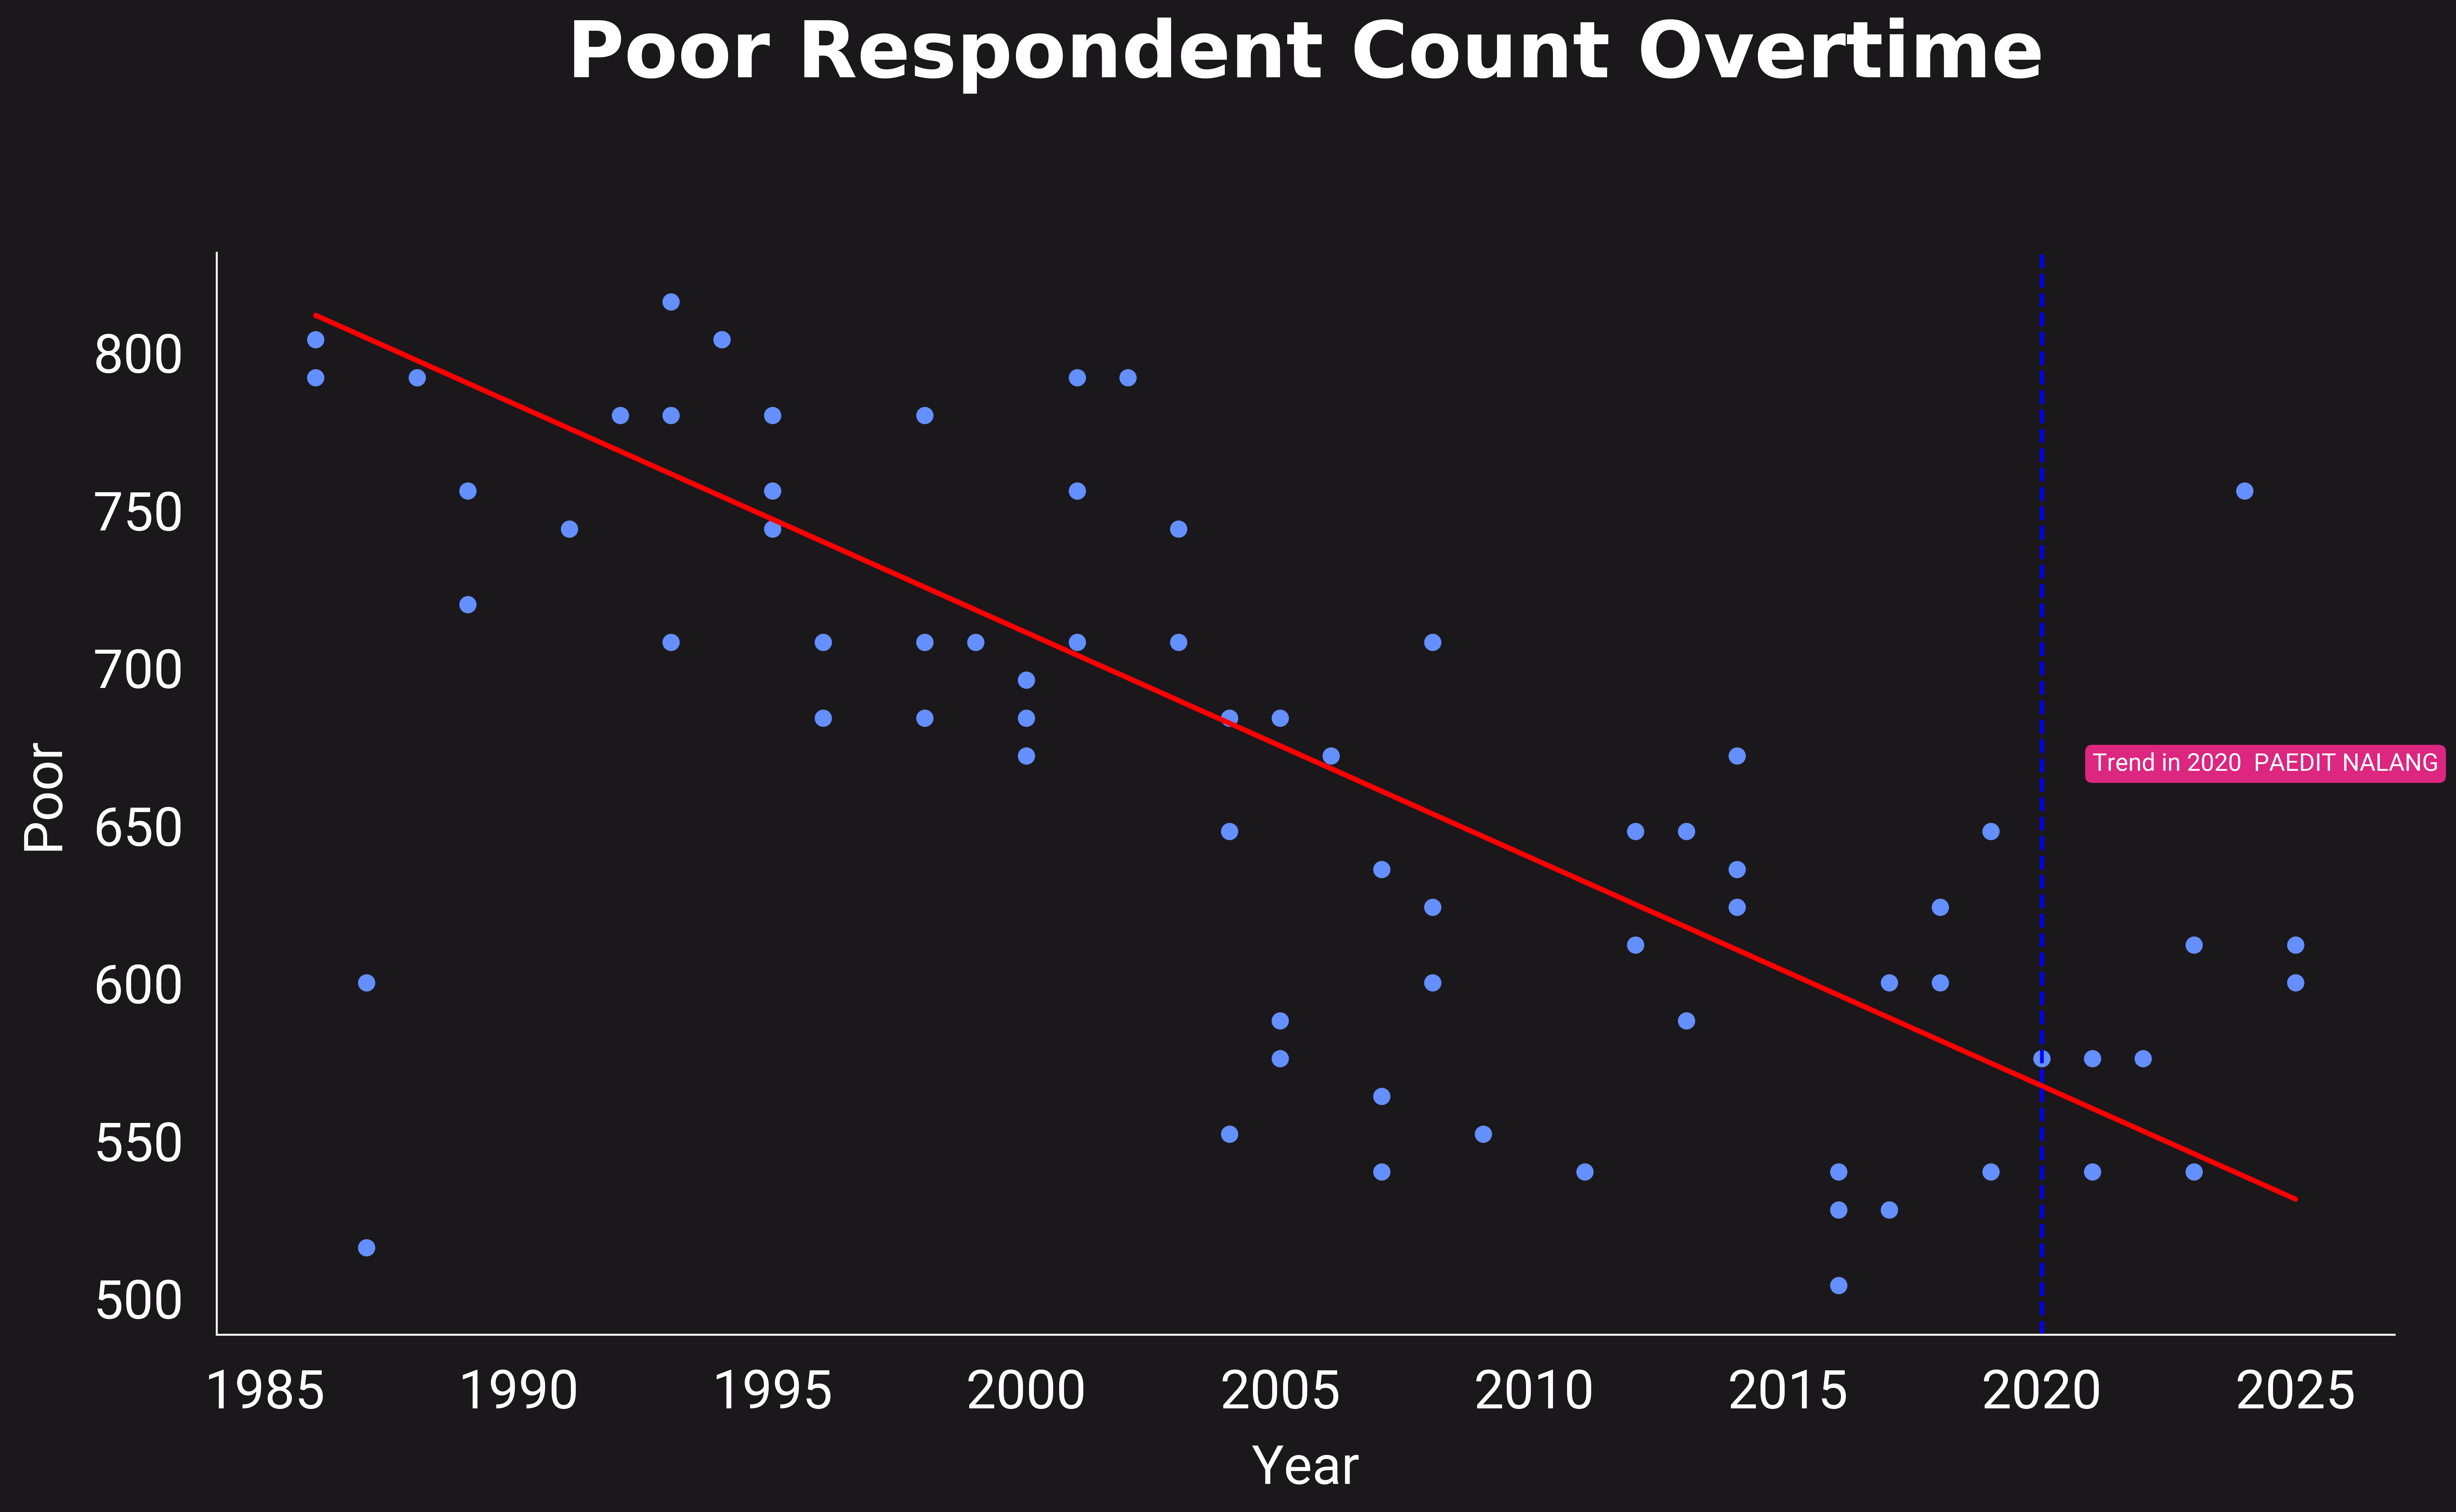

In [19]:
fig = plt.figure()
ax = plt.gca()
ax.set_facecolor(color_bg)

plt.scatter(X_test, Y_test, color=colors[0], label='Actual Data', s=50)  

plt.plot(X_test, Y_pred, color='red', label='Predicted Trend', linewidth=2)

# Change to whatever hehe
specific_year = 2020
plt.axvline(x=specific_year, color='blue', linestyle='--', )

idx = np.where(X_test == specific_year)[0][0]
specific_y = Y_pred[idx]

# Annotate text above the trendline
plt.annotate(
    f'Trend in {specific_year}  PAEDIT NALANG',  
    xy=(specific_year, specific_y),  
    xytext=(specific_year + 1, specific_y + 100),  # Adjust position for clarity
    arrowprops=dict(facecolor=colors[2], arrowstyle='->', lw=1.5),  
    fontsize=10,
    bbox=dict(boxstyle='round,pad=0.3', edgecolor='white', facecolor=colors[2])  # Text box style
)


plt.xlabel('Year')
plt.ylabel('Poor')
plt.title('Poor Respondent Count Overtime', fontdict={'family' : 'Roboto Bold'})

# plt.legend(loc='lower left')
